In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load in data
df = pd.read_csv('spotify_songs.csv', encoding='latin-1')
# Explore data
df
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [3]:
# Check for missing data
print(df.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [4]:
# Checking for duplicates
duplicates = df.duplicated(subset=['track_id'])

print(f'Number of duplicate rows: {duplicates.sum()}')

df.drop_duplicates(subset=['track_id'])

Number of duplicate rows: 4477


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [5]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [6]:
columns_to_check = ['track_popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

# Convert specified columns to numeric, coerce non-numeric values to NaN
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the specified columns
df_cleaned = df.dropna(subset=columns_to_check)

# Display the cleaned DataFrame
df_cleaned

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [7]:
# Sort by key features relating to chart placement
df_sorted = df_cleaned.sort_values(by=['track_popularity'], ascending=False).reset_index()
# Display the sorted data frame
df_sorted

,index,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,...,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.5130,98.027,209438
1,1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,...,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.5130,98.027,209438
2,30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 ð¥Top 2020ð¥Hits 2020ð¥Summe...,3xMQTDLOIGvj3lWH5e5x6F,...,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636
3,23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 ð¥Top 2020ð¥Hits 2020ð¥Summe...,3xMQTDLOIGvj3lWH5e5x6F,...,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636
4,21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,...,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,15604,1RvuWdj9YsXn4cMMLXr85Z,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0,2aEyBG1K73KtNscS50y4aO,Hot Rocks 1964-1971,1971-12-20,Classic Hard Rock,1gAeQGQ7hr2q7IYmaejDW6,...,9,-8.649,1,0.0481,0.000324,0.174000,0.1020,0.8540,135.595,222800
32829,4977,5mIrFiQO3VwnMK4GAyJOfr,Stone,JOY.,0,1ysNmx1dAvavHHhYE9CtnI,Stone,2014-10-28,Indie Poptimism!,4hKPJNFIhdAg4pAksn78FJ,...,6,-11.940,1,0.0592,0.095700,0.002820,0.0975,0.0936,124.880,230113
32830,4975,0xRrshu5CURGo859MmCvWf,Walk Away,LANY,0,4JjVMXIedbfnbTENY1P5Ij,Hot Lights,2014-04-22,Indie Poptimism!,4hKPJNFIhdAg4pAksn78FJ,...,10,-9.649,1,0.0342,0.264000,0.000418,0.1030,0.2680,85.306,231692
32831,11326,4nLuHzKM936R5IDgVwuDh7,The Back Seat Of My Car,Paul McCartney,0,4FqFaw9BTntS6dZkk0PNe4,Wingspan (UK Version),2001-05-07,The Black Album,0KNLLunbFh9XgitPMOGmQg,...,10,-9.348,1,0.0323,0.714000,0.003310,0.6170,0.4820,163.205,268533


In [8]:
df_sorted.columns

Index(['index', 'track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [9]:
# Select relevant columns for analysis
selected_columns = ['track_popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

# Select the relevant columns for correlation
df_correlation = df_sorted[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_correlation.corr()

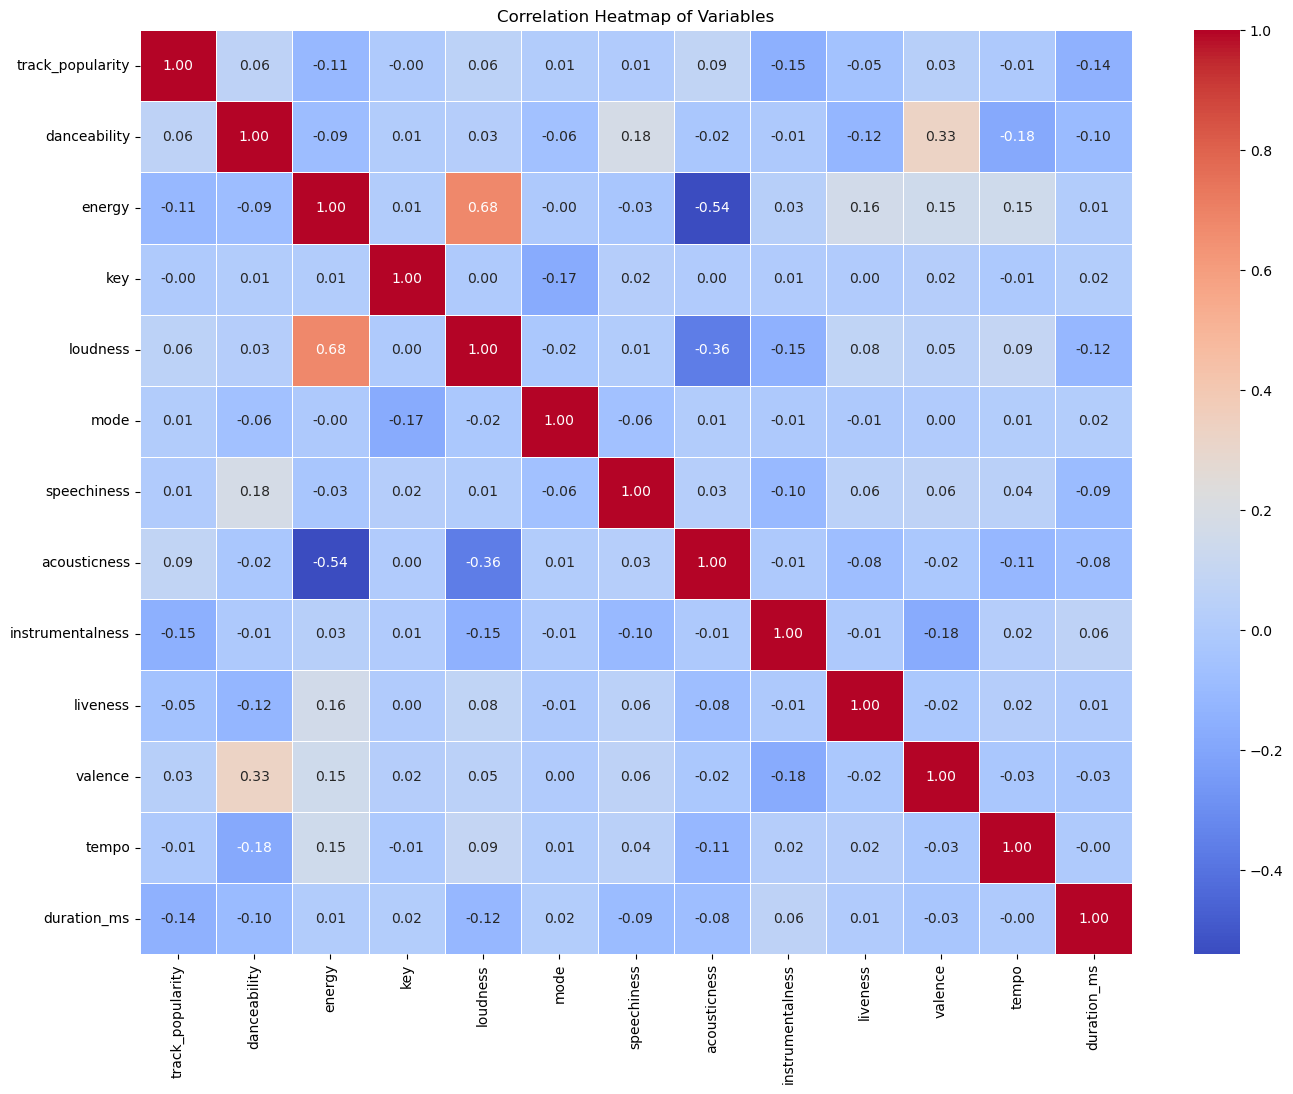

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [11]:
# Create a DataFrame with selected columns
df_regression = df_sorted[selected_columns]

# Split the data into training and testing sets
X = df_regression[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
y = df_regression['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 19.94116921720777
Mean Squared Error: 572.2436513618549
Root Mean Squared Error: 23.921614731490322


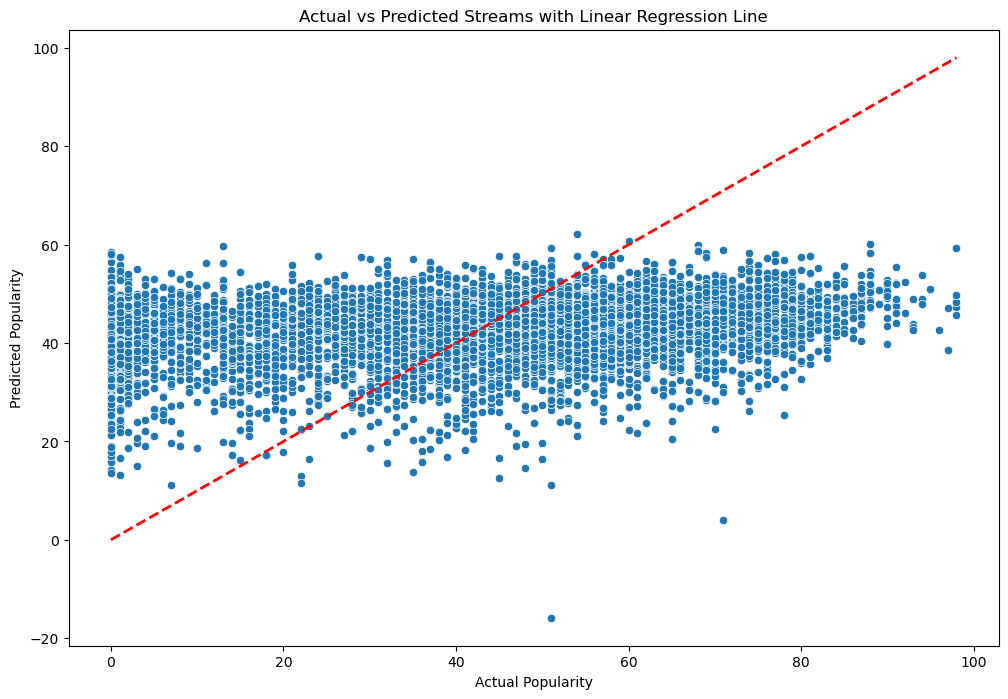

In [13]:
# Plot the linear regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Streams with Linear Regression Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

In [14]:
for column in columns_to_check:
    upper_limit = df_regression[column].mean() + 3 * df_regression[column].std()
    lower_limit = df_regression[column].mean() - 3 * df_regression[column].std()
    df_regression = df_regression[(df_regression[column] < upper_limit) & (df_regression[column] > lower_limit)]

# Splitting the data into features and target variable
X = df_regression.drop('track_popularity', axis=1)
y = df_regression['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining a smaller parameter grid for Grid Search
small_param_grid = {
    'n_estimators': [100, 200],  # Reduced number of trees
    'max_depth': [None, 10],      # Reduced depth options
    'min_samples_split': [2, 5],  # Reduced split options
    'min_samples_leaf': [1, 2]    # Reduced leaf options
}

# Creating the Grid Search model with a smaller parameter grid
small_rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                    param_grid=small_param_grid, 
                                    cv=3,  # 3-fold cross-validation
                                    verbose=2, 
                                    n_jobs=-1)

# Fitting the Grid Search model
small_rf_grid_search.fit(X_train, y_train)

# Best parameters found by Grid Search
small_best_params = small_rf_grid_search.best_params_

# Best model
small_best_rf_model = small_rf_grid_search.best_estimator_

# Evaluating the best model
small_best_rf_y_pred = small_best_rf_model.predict(X_test)
small_best_rf_mae = metrics.mean_absolute_error(y_test, small_best_rf_y_pred)
small_best_rf_mse = metrics.mean_squared_error(y_test, small_best_rf_y_pred)
small_best_rf_rmse = metrics.mean_squared_error(y_test, small_best_rf_y_pred, squared=False)

r2 = r2_score(y_test, small_best_rf_y_pred)
print(f'R^2 Score: {r2:.2f}')
print("Best Random Forest Model Metrics after Hyperparameter Tuning:")
print("MAE:", small_best_rf_mae)
print("MSE:", small_best_rf_mse)
print("RMSE:", small_best_rf_rmse)
print("Best Parameters:", small_best_params)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
R^2 Score: 0.29
Best Random Forest Model Metrics after Hyperparameter Tuning:
MAE: 16.249920947860954
MSE: 438.12960037463523
RMSE: 20.931545580167633
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


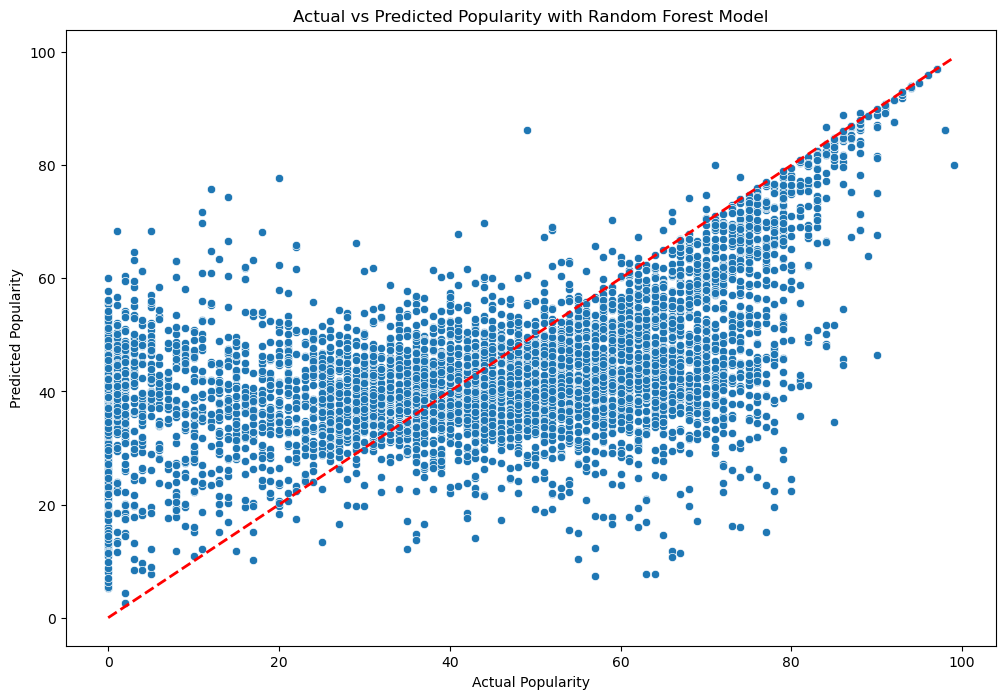

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=small_best_rf_y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity with Random Forest Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.show()

In [16]:
# Select relevant features and target variable
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms']
target = 'track_popularity'

# Function to calculate correlation between features and target variable
def calculate_correlation(data, features, target):
    return data[features].corrwith(data[target])

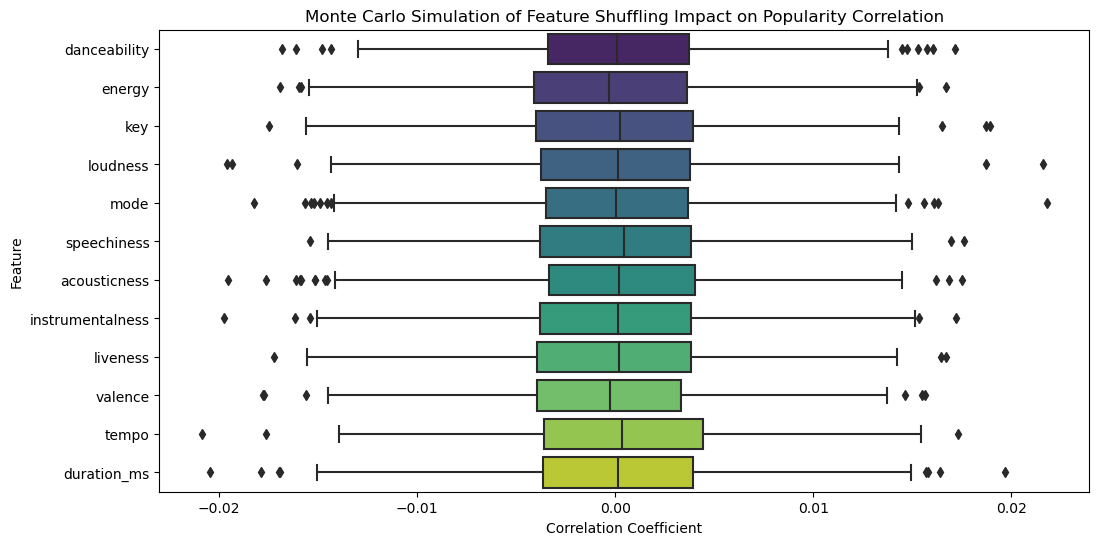

In [17]:
# Run Monte Carlo simulations
num_simulations = 1000
correlations = []

for _ in range(num_simulations):
    # Create a copy of the original DataFrame and shuffle feature columns
    shuffled_df = df.copy()
    shuffled_df[features] = shuffled_df[features].apply(np.random.permutation, axis=0)

    # Calculate correlation with shuffled features
    correlation = calculate_correlation(shuffled_df, features, target)
    correlations.append(correlation)

# Convert the list of correlations to a DataFrame
correlation_df = pd.DataFrame(correlations, columns=features)

# Plot the results
plt.figure(figsize=(12, 6))
sns.boxplot(data=correlation_df, orient='h', palette='viridis')
plt.title('Monte Carlo Simulation of Feature Shuffling Impact on Popularity Correlation')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

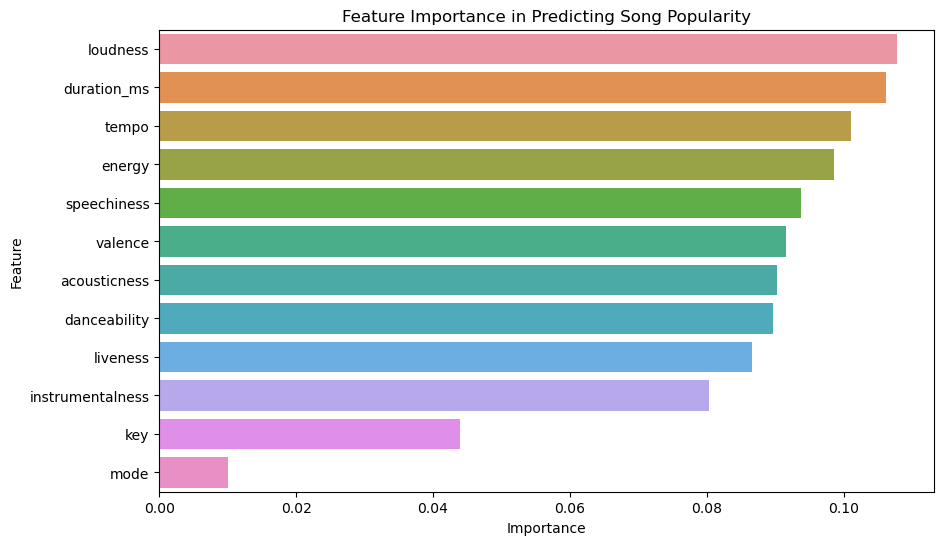

In [18]:
# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Song Popularity')
plt.show()

This bar chart illustrates the importance of different features in predicting song popularity using a Random Forest model. The model, with 100 estimators, was trained on the specified features. Feature importances were then calculated and visualized. Each bar in the chart corresponds to a feature, and its height represents the importance assigned by the model. Understanding feature importance aids in identifying the key factors influencing song popularity as determined by the Random Forest algorithm.

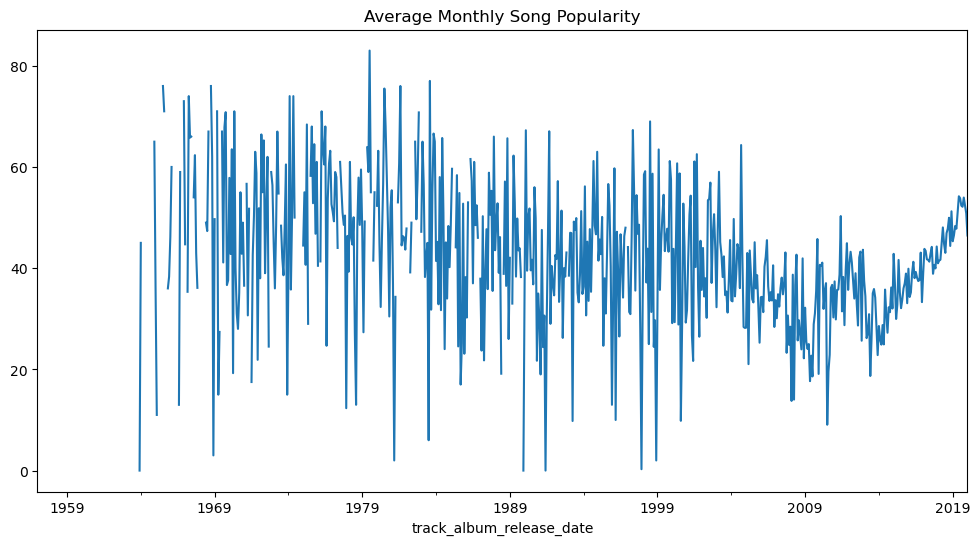

In [19]:
df_sorted['track_album_release_date'] = pd.to_datetime(df_sorted['track_album_release_date'])
df_sorted.set_index('track_album_release_date', inplace=True)

# Resample the data for monthly frequency
monthly_popularity = df_sorted['track_popularity'].resample('M').mean()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_popularity.plot(title='Average Monthly Song Popularity')
plt.show()

The presented plot illustrates the average monthly popularity of songs over time. To prepare the data for temporal analysis, the 'track_album_release_date' column is first converted to datetime format using the 'pd.to_datetime' function. Subsequently, the DataFrame is indexed by the release date to facilitate time-based operations. The song popularity data is then resampled to obtain the mean popularity for each month. The 'resample' function with the argument 'M' designates a monthly frequency. Finally, a time series plot is generated, depicting the evolution of average song popularity over months. In this visualization, the x-axis corresponds to time (in months), while the y-axis represents the average popularity of songs for each respective month. This plot serves as a tool for uncovering trends or patterns in song popularity, providing insights into how the popularity of songs changes over the course of time.

In [20]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Print the cross-validated RMSE scores
print('Cross-validated RMSE scores:', rmse_scores)
print('Mean RMSE:', np.mean(rmse_scores))

Cross-validated RMSE scores: [39.46500756 21.2402495   9.04212517 17.60158415 47.50883049]
Mean RMSE: 26.971559371005974


/Users/aahiljubair/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/vz/j0wzw2bn5n18914y9ry267240000gn/T/ipykernel_48956/4262930766.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)


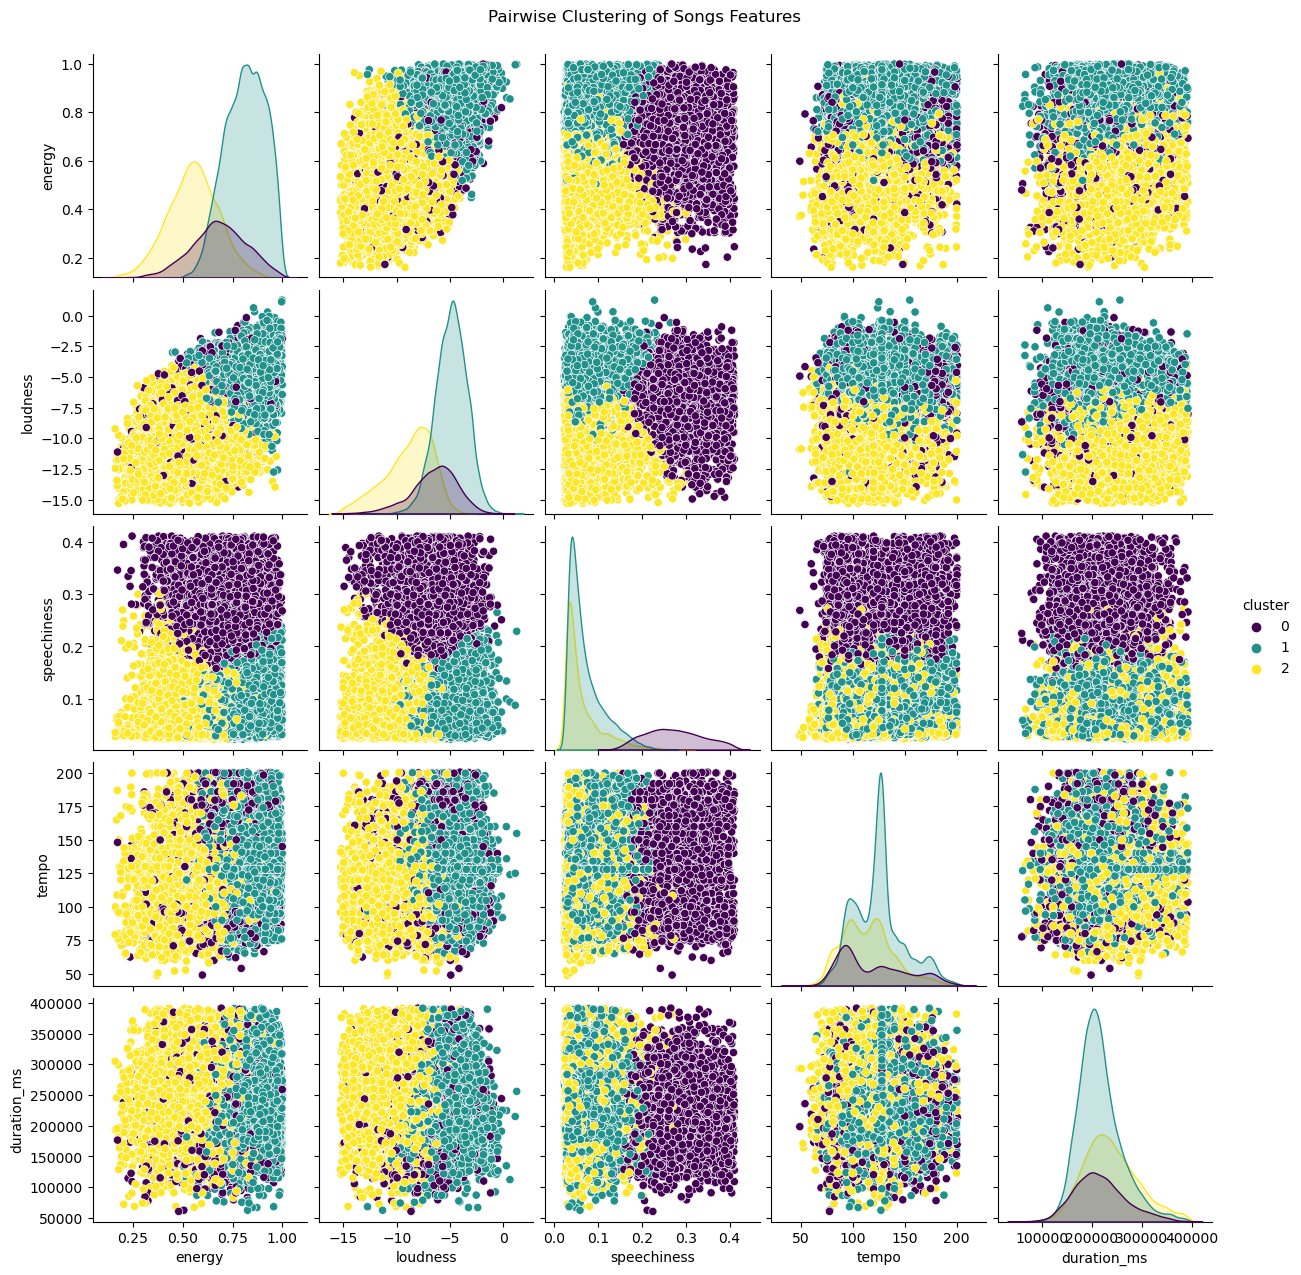

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  52.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  53.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  16.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  16.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  17.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  53.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  53.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20

In [22]:
features_for_clustering = ['energy', 'loudness', 'speechiness','tempo','duration_ms']

# Select features for clustering
df_cluster = df_regression[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Number of clusters
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Visualize the clusters in 2D
sns.pairplot(df_cluster, hue='cluster', palette='viridis')
plt.suptitle('Pairwise Clustering of Songs Features', y=1.02)
plt.savefig('pairwise_clustering.png')

plt.show()